# E-commerce Dataset
We will work on a E-commerce Dataset from a company. It has customer info such as Email, Address,	Avatar,	Avg. Session Length, Time on App, Time on Website, Length of Membership, Yearly Amount Spent. We will perform Exploratory Data Analysis, Data Visualisation and then perform some Predictions.

### *The Imports*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Reading the Data as customers**

In [5]:
customers= pd.read_csv("Ecommerce Customers")

### *Basic Info of our Data*

In [6]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Lets Explore..!

**Create a jointplot to compare the time on app and the yearly amount spent columns**

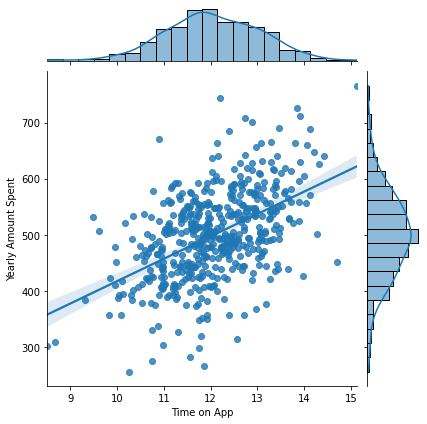

In [19]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers,kind='reg')

**Create a jointplot to compare the time on website and the yearly amount spent columns**

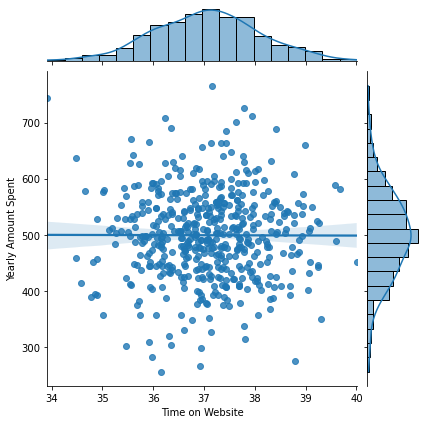

In [15]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers,kind='reg')

**Use Seaborn to compare time on app and length of membership**

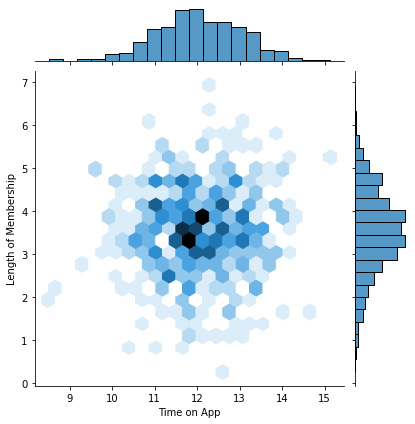

In [23]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customers,kind='hex')

**Create a pairplot to visualise the entire dataset**

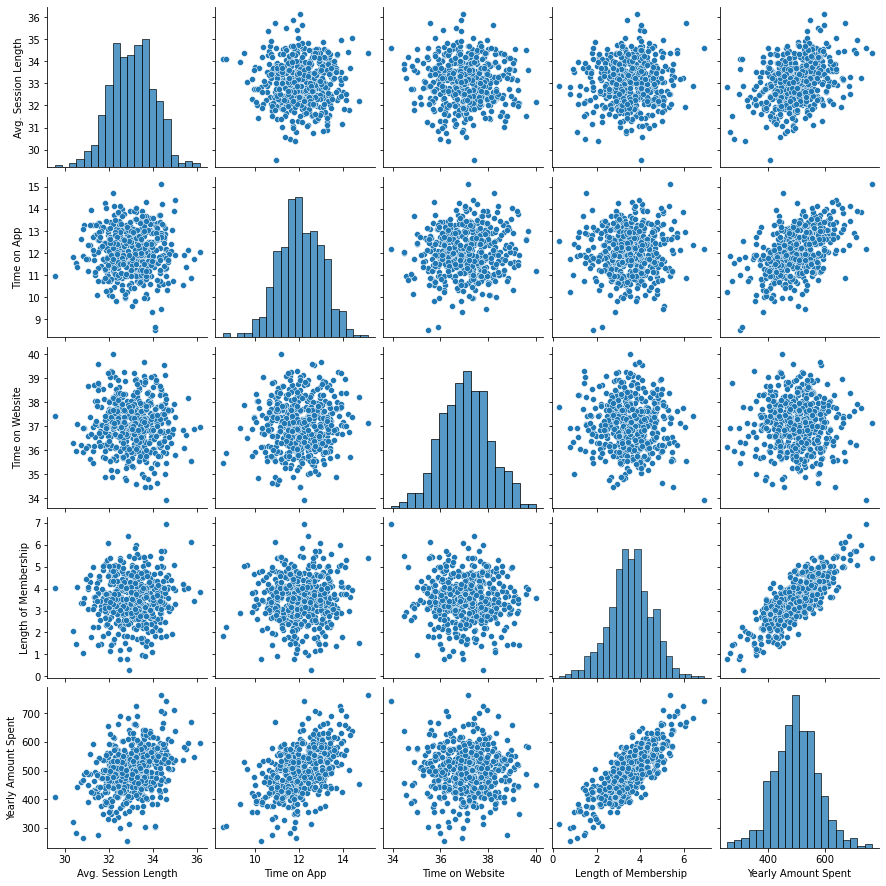

In [24]:
sns.pairplot(customers)

#### Create a lmplot for Yearly Amount Spent vs Length of Membership

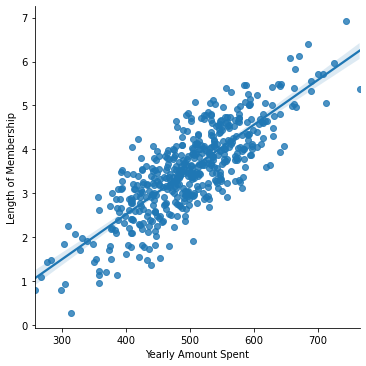

In [25]:
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=customers)

### Data Predictions
Let's move forward to Predict Some Data 

**Divide the data into Training and Testing sets**

In [26]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [29]:
y = customers['Yearly Amount Spent']
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

**Use cross validation train test split from sklearn to split the data into training and testing data sets**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

**Training the model using linear regression**

In [32]:
from sklearn.linear_model import LinearRegression

**Create an object of LinearRegression()**

In [33]:
lm =LinearRegression()

#### Train/fit your model

In [34]:
lm.fit(X_train, y_train)

LinearRegression()

**Print out the coefficients of the model**

In [35]:
lm.coef_

array([25.91225933, 38.50812563,  0.28871629, 61.16161032])

### Predicting Test Data

**Now that we have fit our model lets evaluate its performance by predicting off the test values**

In [37]:
predictions = lm.predict(X_test)

**Plotting a scatterplot for real test values vs the predicted values**

Text(0, 0.5, 'True Values')

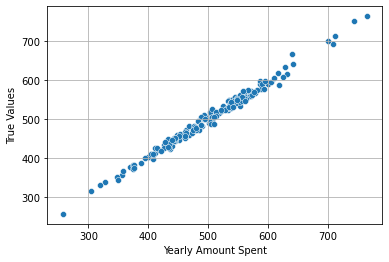

In [48]:
sns.scatterplot(x=y_test,y=predictions)
plt.grid()
plt.ylabel('True Values')

### Evaluate the model


**Calculate the mean absolute error, mean squared error, and the root mean square error**

In [49]:
from sklearn import metrics

In [51]:
print("MAE :",metrics.mean_absolute_error(y_test,predictions))
print("MSE :",metrics.mean_squared_error(y_test,predictions))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE : 7.294546588331306
MSE : 81.90726984520916
RMSE : 9.0502635235229


**Explained Variance Score**

In [52]:
metrics.explained_variance_score(y_test,predictions)

0.988218935704259

### Residuals

**Plot a histogram of the residuals to make sure it looks normally distributed**

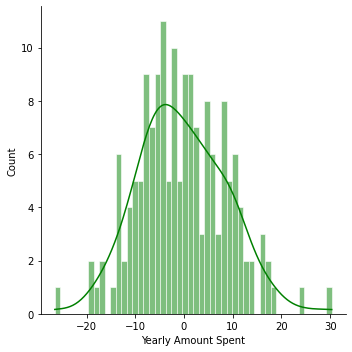

In [58]:
sns.displot(y_test-predictions,kde=True,bins=50,lw=2,edgecolor='white',color='green')

### Conclusion

**We need an answer to the question of whether should the company focus on there mobile app or should they focus on web development**

In [60]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

,Coeff
Avg. Session Length,25.912259
Time on App,38.508126
Time on Website,0.288716
Length of Membership,61.161610


The Company should focus more on the App